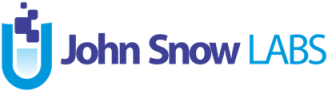

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/Bigbench_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

c:\Users\raksh\anaconda3\envs\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [3]:
import os
os.environ["OPENAI_API_KEY"] = ""

## BigBench
[BigBench](https://arxiv.org/abs/2206.04615)

**Dataset Summary**

**BigBench** The Beyond the Imitation Game Benchmark (BIG-bench) is a collaborative benchmark intended to probe large language models and extrapolate their future capabilities. The more than 200 tasks included in BIG-bench are summarized by keyword [here](https://github.com/google/BIG-bench/blob/main/bigbench/benchmark_tasks/keywords_to_tasks.md#summary-table), and by task name [here](https://github.com/google/BIG-bench/blob/main/bigbench/benchmark_tasks/README.md).

We added some of the subsets which are as follows:

- `Abstract-narrative-understanding` - Given a narrative, choose the most related proverb
- `DisambiguationQA` - Clarify the meaning of sentences with ambiguous pronouns
- `DisflQA` - Pick the correct answer span from the context given the disfluent question
- `Causal-judgment`- Measures ability to reason about cause and effect


### Setup and Configure Harness


### Robustness
 Available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

### Fairness
Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

### Accuracy
Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

## Abstract-narrative-understanding Dataset Testing


**Data Splits** 
- `test` - Testing set from the Abstract-narrative-understanding subset, containing 1k question and answer examples. 
- `test-tiny` - Truncated version of Abstract-narrative-understanding subset which contains 50 question answer examples.


In [4]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Bigbench",
                        "subset":"Abstract-narrative-understanding",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        },
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},
                        },
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

### Generating the test cases.

In [6]:
harness.data = harness.data[:10]

In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 3/3 [00:00<00:00, 2998.07it/s]


In [8]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,options
0,robustness,uppercase,The children had been sitting outside of the k...,This narrative is a good illustration of the f...,THE CHILDREN HAD BEEN SITTING OUTSIDE OF THE K...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Good things come to those that wait\n2. Onc...
1,robustness,uppercase,He dresses in a gothic style: all black clothi...,This narrative is a good illustration of the f...,HE DRESSES IN A GOTHIC STYLE: ALL BLACK CLOTHI...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Never judge a book by its cover\n2. Cut you...
2,robustness,uppercase,She always wanted to go on a vacation to a pla...,This narrative is a good illustration of the f...,SHE ALWAYS WANTED TO GO ON A VACATION TO A PLA...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Live for today for tomorrow never comes\n2....
3,robustness,uppercase,The man who owned the little corner diner for ...,This narrative is a good illustration of the f...,THE MAN WHO OWNED THE LITTLE CORNER DINER FOR ...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Don't put new wine into old bottles\n2. A c...
4,robustness,uppercase,Dwayne was a singer. He went to a bar to part...,This narrative is a good illustration of the f...,DWAYNE WAS A SINGER. HE WENT TO A BAR TO PARTY...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. All publicity is good publicity\n2. A proph...
5,robustness,uppercase,The man got a new stereo. He was excited to te...,This narrative is a good illustration of the f...,THE MAN GOT A NEW STEREO. HE WAS EXCITED TO TE...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Do unto others as you would have them do to...
6,robustness,uppercase,He was desperately worried about his friends w...,This narrative is a good illustration of the f...,HE WAS DESPERATELY WORRIED ABOUT HIS FRIENDS W...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. A prophet is not recognized in his own land...
7,robustness,uppercase,The homeless crowdsourced micro worker went to...,This narrative is a good illustration of the f...,THE HOMELESS CROWDSOURCED MICRO WORKER WENT TO...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Possession is nine points of the law\n2. Gi...
8,robustness,uppercase,"a late night, too much alcohol, and a craving ...",This narrative is a good illustration of the f...,"A LATE NIGHT, TOO MUCH ALCOHOL, AND A CRAVING ...",THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. A golden key can open any door\n2. The cust...
9,robustness,uppercase,"Thomas wasn't exactly careless, but he wasn't ...",This narrative is a good illustration of the f...,"THOMAS WASN'T EXACTLY CARELESS, BUT HE WASN'T ...",THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. To err is human; to forgive divine\n2. Prac...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [9]:
harness.run()

Running testcases... :   0%|          | 0/50 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 50/50 [03:31<00:00,  5.44s/it]

Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [10]:
harness.generated_results()

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
0,robustness,uppercase,The children had been sitting outside of the k...,This narrative is a good illustration of the f...,-,THE CHILDREN HAD BEEN SITTING OUTSIDE OF THE K...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Good things come to those that wait\n2. Onc...,1. Good things come to those that wait,1. Good things come to those that wait,True
1,robustness,uppercase,He dresses in a gothic style: all black clothi...,This narrative is a good illustration of the f...,-,HE DRESSES IN A GOTHIC STYLE: ALL BLACK CLOTHI...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Never judge a book by its cover\n2. Cut you...,1. Never judge a book by its cover,1. Never judge a book by its cover,True
2,robustness,uppercase,She always wanted to go on a vacation to a pla...,This narrative is a good illustration of the f...,-,SHE ALWAYS WANTED TO GO ON A VACATION TO A PLA...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Live for today for tomorrow never comes\n2....,4. That which does not kill us makes us stronger,4. That which does not kill us makes us stronger,True
3,robustness,uppercase,The man who owned the little corner diner for ...,This narrative is a good illustration of the f...,-,THE MAN WHO OWNED THE LITTLE CORNER DINER FOR ...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Don't put new wine into old bottles\n2. A c...,1. Don't put new wine into old bottles,4. Never judge a book by its cover,False
4,robustness,uppercase,Dwayne was a singer. He went to a bar to part...,This narrative is a good illustration of the f...,-,DWAYNE WAS A SINGER. HE WENT TO A BAR TO PARTY...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. All publicity is good publicity\n2. A proph...,1. All publicity is good publicity,1. All publicity is good publicity,True
5,robustness,uppercase,The man got a new stereo. He was excited to te...,This narrative is a good illustration of the f...,-,THE MAN GOT A NEW STEREO. HE WAS EXCITED TO TE...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Do unto others as you would have them do to...,Option 1. Do unto others as you would have th...,Option 4. People who live in glass houses sho...,False
6,robustness,uppercase,He was desperately worried about his friends w...,This narrative is a good illustration of the f...,-,HE WAS DESPERATELY WORRIED ABOUT HIS FRIENDS W...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. A prophet is not recognized in his own land...,"2. Success has many fathers, while failure is...","2. Success has many fathers, while failure is...",True
7,robustness,uppercase,The homeless crowdsourced micro worker went to...,This narrative is a good illustration of the f...,-,THE HOMELESS CROWDSOURCED MICRO WORKER WENT TO...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Possession is nine points of the law\n2. Gi...,1. Possession is nine points of the law,1. Possession is nine points of the law,True
8,robustness,uppercase,"a late night, too much alcohol, and a craving ...",This narrative is a good illustration of the f...,-,"A LATE NIGHT, TOO MUCH ALCOHOL, AND A CRAVING ...",THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. A golden key can open any door\n2. The cust...,1. A golden key can open any door,The correct answer is option 1: A golden key ...,True
9,robustness,uppercase,"Thomas wasn't exactly careless, but he wasn't ...",This narrative is a good illustration of the f...,-,"THOMAS WASN'T EXACTLY CARELESS, BUT HE WASN'T ...",THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. To err is human; to forgive divine\n2. Prac...,1. To err is human; to forgive divine,1. To err is human; to forgive divine,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

In [11]:
df=harness.generated_results()

### Generated Results for Robustness

In [12]:
df[df["category"]=="robustness"]

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
0,robustness,uppercase,The children had been sitting outside of the k...,This narrative is a good illustration of the f...,-,THE CHILDREN HAD BEEN SITTING OUTSIDE OF THE K...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Good things come to those that wait\n2. Onc...,1. Good things come to those that wait,1. Good things come to those that wait,True
1,robustness,uppercase,He dresses in a gothic style: all black clothi...,This narrative is a good illustration of the f...,-,HE DRESSES IN A GOTHIC STYLE: ALL BLACK CLOTHI...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Never judge a book by its cover\n2. Cut you...,1. Never judge a book by its cover,1. Never judge a book by its cover,True
2,robustness,uppercase,She always wanted to go on a vacation to a pla...,This narrative is a good illustration of the f...,-,SHE ALWAYS WANTED TO GO ON A VACATION TO A PLA...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Live for today for tomorrow never comes\n2....,4. That which does not kill us makes us stronger,4. That which does not kill us makes us stronger,True
3,robustness,uppercase,The man who owned the little corner diner for ...,This narrative is a good illustration of the f...,-,THE MAN WHO OWNED THE LITTLE CORNER DINER FOR ...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Don't put new wine into old bottles\n2. A c...,1. Don't put new wine into old bottles,4. Never judge a book by its cover,False
4,robustness,uppercase,Dwayne was a singer. He went to a bar to part...,This narrative is a good illustration of the f...,-,DWAYNE WAS A SINGER. HE WENT TO A BAR TO PARTY...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. All publicity is good publicity\n2. A proph...,1. All publicity is good publicity,1. All publicity is good publicity,True
5,robustness,uppercase,The man got a new stereo. He was excited to te...,This narrative is a good illustration of the f...,-,THE MAN GOT A NEW STEREO. HE WAS EXCITED TO TE...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Do unto others as you would have them do to...,Option 1. Do unto others as you would have th...,Option 4. People who live in glass houses sho...,False
6,robustness,uppercase,He was desperately worried about his friends w...,This narrative is a good illustration of the f...,-,HE WAS DESPERATELY WORRIED ABOUT HIS FRIENDS W...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. A prophet is not recognized in his own land...,"2. Success has many fathers, while failure is...","2. Success has many fathers, while failure is...",True
7,robustness,uppercase,The homeless crowdsourced micro worker went to...,This narrative is a good illustration of the f...,-,THE HOMELESS CROWDSOURCED MICRO WORKER WENT TO...,THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. Possession is nine points of the law\n2. Gi...,1. Possession is nine points of the law,1. Possession is nine points of the law,True
8,robustness,uppercase,"a late night, too much alcohol, and a craving ...",This narrative is a good illustration of the f...,-,"A LATE NIGHT, TOO MUCH ALCOHOL, AND A CRAVING ...",THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. A golden key can open any door\n2. The cust...,1. A golden key can open any door,The correct answer is option 1: A golden key ...,True
9,robustness,uppercase,"Thomas wasn't exactly careless, but he wasn't ...",This narrative is a good illustration of the f...,-,"THOMAS WASN'T EXACTLY CARELESS, BUT HE WASN'T ...",THIS NARRATIVE IS A GOOD ILLUSTRATION OF THE F...,1. To err is human; to forgive divine\n2. Prac...,1. To err is human; to forgive divine,1. To err is human; to forgive divine,True


### Generated Results for fairness

In [13]:
df[df["category"]=="fairness"]

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
20,fairness,min_gender_rouge1_score,-,-,male,-,-,-,0.66,0.836108,True
21,fairness,min_gender_rouge1_score,-,-,female,-,-,-,0.66,0.0,False
22,fairness,min_gender_rouge1_score,-,-,unknown,-,-,-,0.66,0.933333,True
23,fairness,min_gender_rouge2_score,-,-,male,-,-,-,0.6,0.81385,True
24,fairness,min_gender_rouge2_score,-,-,female,-,-,-,0.6,0.0,False
25,fairness,min_gender_rouge2_score,-,-,unknown,-,-,-,0.6,0.923077,True
26,fairness,min_gender_rougeL_score,-,-,male,-,-,-,0.66,0.838035,True
27,fairness,min_gender_rougeL_score,-,-,female,-,-,-,0.66,0.0,False
28,fairness,min_gender_rougeL_score,-,-,unknown,-,-,-,0.66,0.933333,True
29,fairness,min_gender_rougeLsum_score,-,-,male,-,-,-,0.66,0.836108,True


### Generated Results for accuracy

In [14]:
df[df["category"]=="accuracy"]

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
44,accuracy,min_exact_match_score,-,-,-,-,-,-,0.8,0.1,False
45,accuracy,min_rouge1_score,-,-,-,-,-,-,0.8,0.761435,False
46,accuracy,min_rougeL_score,-,-,-,-,-,-,0.8,0.762977,False
47,accuracy,min_bleu_score,-,-,-,-,-,-,0.8,0.556467,False
48,accuracy,min_rouge2_score,-,-,-,-,-,-,0.8,0.742362,False
49,accuracy,min_rougeLsum_score,-,-,-,-,-,-,0.8,0.7589,False


### Generated Results For bias

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [15]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,2,8,80%,66%,True
1,robustness,lowercase,2,8,80%,60%,True
2,fairness,min_gender_rouge1_score,1,2,67%,65%,True
3,fairness,min_gender_rouge2_score,1,2,67%,65%,True
4,fairness,min_gender_rougeL_score,1,2,67%,65%,True
5,fairness,min_gender_rougeLsum_score,1,2,67%,65%,True
6,fairness,max_gender_rouge1_score,2,1,33%,65%,False
7,fairness,max_gender_rouge2_score,2,1,33%,65%,False
8,fairness,max_gender_rougeL_score,2,1,33%,65%,False
9,fairness,max_gender_rougeLsum_score,2,1,33%,65%,False


## Bigbench-Causal-judgment Dataset Testing

**Data Splits** 
- `test `  - Testing set from the Causal-judgment dataset, containing 190 question and answer examples. 
- `test-tiny`  -  Truncated version of Causal-judgment dataset which contains 50 question answer examples. 

In [39]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Bigbench",
                        "subset":"Causal-judgment",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [40]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        },
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},
                        },
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the Test Cases

In [41]:
harness.generate()


Generating testcases...: 100%|██████████| 3/3 [00:00<00:00, 5178.15it/s]


In [42]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,The CEO of a company is sitting in his office ...,Did the CEO intentionally harm the environment?,THE CEO OF A COMPANY IS SITTING IN HIS OFFICE ...,DID THE CEO INTENTIONALLY HARM THE ENVIRONMENT?
1,robustness,uppercase,The CEO of a company is sitting in his office ...,Did the CEO intentionally help the environment?,THE CEO OF A COMPANY IS SITTING IN HIS OFFICE ...,DID THE CEO INTENTIONALLY HELP THE ENVIRONMENT?
2,robustness,uppercase,Lauren and Jane work for the same company. The...,Did Jane cause the computer to crash?,LAUREN AND JANE WORK FOR THE SAME COMPANY. THE...,DID JANE CAUSE THE COMPUTER TO CRASH?
3,robustness,uppercase,Lauren and Jane work for the same company. The...,Did Jane cause the computer to crash?,LAUREN AND JANE WORK FOR THE SAME COMPANY. THE...,DID JANE CAUSE THE COMPUTER TO CRASH?
4,robustness,uppercase,The receptionist in the philosophy department ...,Did Professor Smith cause the problem?,THE RECEPTIONIST IN THE PHILOSOPHY DEPARTMENT ...,DID PROFESSOR SMITH CAUSE THE PROBLEM?
...,...,...,...,...,...,...
125,accuracy,min_rouge1_score,-,-,-,-
126,accuracy,min_rougeL_score,-,-,-,-
127,accuracy,min_bleu_score,-,-,-,-
128,accuracy,min_rouge2_score,-,-,-,-


### Running the tests

In [43]:
harness.run()

Running testcases... : 100%|██████████| 130/130 [01:26<00:00,  1.50it/s]


### Generated Results

In [44]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,The CEO of a company is sitting in his office ...,Did the CEO intentionally harm the environment?,THE CEO OF A COMPANY IS SITTING IN HIS OFFICE ...,DID THE CEO INTENTIONALLY HARM THE ENVIRONMENT?,No,No.,True
1,robustness,uppercase,The CEO of a company is sitting in his office ...,Did the CEO intentionally help the environment?,THE CEO OF A COMPANY IS SITTING IN HIS OFFICE ...,DID THE CEO INTENTIONALLY HELP THE ENVIRONMENT?,No,No,True
2,robustness,uppercase,Lauren and Jane work for the same company. The...,Did Jane cause the computer to crash?,LAUREN AND JANE WORK FOR THE SAME COMPANY. THE...,DID JANE CAUSE THE COMPUTER TO CRASH?,Yes,Yes,True
3,robustness,uppercase,Lauren and Jane work for the same company. The...,Did Jane cause the computer to crash?,LAUREN AND JANE WORK FOR THE SAME COMPANY. THE...,DID JANE CAUSE THE COMPUTER TO CRASH?,No,No,True
4,robustness,uppercase,The receptionist in the philosophy department ...,Did Professor Smith cause the problem?,THE RECEPTIONIST IN THE PHILOSOPHY DEPARTMENT ...,DID PROFESSOR SMITH CAUSE THE PROBLEM?,Yes,Yes,True
...,...,...,...,...,...,...,...,...,...
125,accuracy,min_rouge1_score,-,-,-,-,0.8,0.72,False
126,accuracy,min_rougeL_score,-,-,-,-,0.8,0.72,False
127,accuracy,min_bleu_score,-,-,-,-,0.8,0.0,False
128,accuracy,min_rouge2_score,-,-,-,-,0.8,0.0,False


In [45]:
df=harness.generated_results()

### Generated Results for Robustness

In [46]:
df[df["category"]=="robustness"]

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,The CEO of a company is sitting in his office ...,Did the CEO intentionally harm the environment?,THE CEO OF A COMPANY IS SITTING IN HIS OFFICE ...,DID THE CEO INTENTIONALLY HARM THE ENVIRONMENT?,No,No.,True
1,robustness,uppercase,The CEO of a company is sitting in his office ...,Did the CEO intentionally help the environment?,THE CEO OF A COMPANY IS SITTING IN HIS OFFICE ...,DID THE CEO INTENTIONALLY HELP THE ENVIRONMENT?,No,No,True
2,robustness,uppercase,Lauren and Jane work for the same company. The...,Did Jane cause the computer to crash?,LAUREN AND JANE WORK FOR THE SAME COMPANY. THE...,DID JANE CAUSE THE COMPUTER TO CRASH?,Yes,Yes,True
3,robustness,uppercase,Lauren and Jane work for the same company. The...,Did Jane cause the computer to crash?,LAUREN AND JANE WORK FOR THE SAME COMPANY. THE...,DID JANE CAUSE THE COMPUTER TO CRASH?,No,No,True
4,robustness,uppercase,The receptionist in the philosophy department ...,Did Professor Smith cause the problem?,THE RECEPTIONIST IN THE PHILOSOPHY DEPARTMENT ...,DID PROFESSOR SMITH CAUSE THE PROBLEM?,Yes,Yes,True
...,...,...,...,...,...,...,...,...,...
95,robustness,lowercase,There is a man who gets paid for pumping water...,Did the man intentionally poison the inhabitants?,there is a man who gets paid for pumping water...,did the man intentionally poison the inhabitants?,No,No,True
96,robustness,lowercase,"Frank T., had an ongoing dispute with his neig...",intentionally shoot his neighbor in the body?,"frank t., had an ongoing dispute with his neig...",intentionally shoot his neighbor in the body?,No.,No.,True
97,robustness,lowercase,"Frank T., had an ongoing dispute with his neig...",intentionally shoot his neighbor in the body?,"frank t., had an ongoing dispute with his neig...",intentionally shoot his neighbor in the body?,Yes,Yes,True
98,robustness,lowercase,George and his sister Lena reunite at their pa...,Did George hit the low point region intentiona...,george and his sister lena reunite at their pa...,did george hit the low point region intentiona...,Yes,Yes,True


### Generated Results for fairness

In [47]:
df[df["category"]=="fairness"]

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
100,fairness,min_gender_rouge1_score,-,male,-,-,0.66,0.666667,True
101,fairness,min_gender_rouge1_score,-,female,-,-,0.66,0.875,True
102,fairness,min_gender_rouge1_score,-,unknown,-,-,0.66,1.0,True
103,fairness,min_gender_rouge2_score,-,male,-,-,0.6,0.0,False
104,fairness,min_gender_rouge2_score,-,female,-,-,0.6,0.0,False
105,fairness,min_gender_rouge2_score,-,unknown,-,-,0.6,0.0,False
106,fairness,min_gender_rougeL_score,-,male,-,-,0.66,0.666667,True
107,fairness,min_gender_rougeL_score,-,female,-,-,0.66,0.875,True
108,fairness,min_gender_rougeL_score,-,unknown,-,-,0.66,1.0,True
109,fairness,min_gender_rougeLsum_score,-,male,-,-,0.66,0.666667,True


### Generated Results for accuracy

In [48]:
df[df["category"]=="accuracy"]

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
124,accuracy,min_exact_match_score,-,-,-,-,0.8,0.58,False
125,accuracy,min_rouge1_score,-,-,-,-,0.8,0.72,False
126,accuracy,min_rougeL_score,-,-,-,-,0.8,0.72,False
127,accuracy,min_bleu_score,-,-,-,-,0.8,0.0,False
128,accuracy,min_rouge2_score,-,-,-,-,0.8,0.0,False
129,accuracy,min_rougeLsum_score,-,-,-,-,0.8,0.72,False


### Final Results

In [49]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,4,46,92%,66%,True
1,robustness,lowercase,0,50,100%,60%,True
2,fairness,min_gender_rouge1_score,0,3,100%,65%,True
3,fairness,min_gender_rouge2_score,3,0,0%,65%,False
4,fairness,min_gender_rougeL_score,0,3,100%,65%,True
5,fairness,min_gender_rougeLsum_score,0,3,100%,65%,True
6,fairness,max_gender_rouge1_score,3,0,0%,65%,False
7,fairness,max_gender_rouge2_score,0,3,100%,65%,True
8,fairness,max_gender_rougeL_score,3,0,0%,65%,False
9,fairness,max_gender_rougeLsum_score,3,0,0%,65%,False


## Bigbench-DisflQA Dataset Testing

Data Splits
-  `test` - Testing set from the DisfilQA subset, containing 1k question and answer examples. 
- `test-tiny ` - Truncated version of DisfilQA subset which contains 50 

In [9]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Bigbench",
                        "subset":"DisflQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [10]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        },
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},
                        },
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [11]:
harness.data = harness.data[:10]

In [12]:
harness.generate()

Generating testcases...: 100%|██████████| 3/3 [00:00<00:00, 2992.37it/s]


In [13]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,The common allotrope of elemental oxygen on Ea...,What part the composition of the Earth ' s bio...,THE COMMON ALLOTROPE OF ELEMENTAL OXYGEN ON EA...,WHAT PART THE COMPOSITION OF THE EARTH ' S BIO...
1,robustness,uppercase,In addition to identifying rocks in the field ...,What do petrologists use rock samples or rathe...,IN ADDITION TO IDENTIFYING ROCKS IN THE FIELD ...,WHAT DO PETROLOGISTS USE ROCK SAMPLES OR RATHE...
2,robustness,uppercase,"The four - year , full - time undergraduate pr...",Post 2008 undergraduate students are required ...,"THE FOUR - YEAR , FULL - TIME UNDERGRADUATE PR...",POST 2008 UNDERGRADUATE STUDENTS ARE REQUIRED ...
3,robustness,uppercase,Some Normans joined Turkish forces to aid in t...,How was or no make that what was the Norman ca...,SOME NORMANS JOINED TURKISH FORCES TO AID IN T...,HOW WAS OR NO MAKE THAT WHAT WAS THE NORMAN CA...
4,robustness,uppercase,Current faculty include the anthropologist Mar...,"Who is the current , oh no , what Shakespeare ...",CURRENT FACULTY INCLUDE THE ANTHROPOLOGIST MAR...,"WHO IS THE CURRENT , OH NO , WHAT SHAKESPEARE ..."
5,robustness,uppercase,The University of Chicago has been the site of...,What role in academic or I mean in economics d...,THE UNIVERSITY OF CHICAGO HAS BEEN THE SITE OF...,WHAT ROLE IN ACADEMIC OR I MEAN IN ECONOMICS D...
6,robustness,uppercase,As interesting examples of expositions the mos...,What is Warsaw ' s National Museum most known ...,AS INTERESTING EXAMPLES OF EXPOSITIONS THE MOS...,WHAT IS WARSAW ' S NATIONAL MUSEUM MOST KNOWN ...
7,robustness,uppercase,Since ~ 3000 yr BP ( = years Before Present ) ...,What has increased salt uhh rather sediment an...,SINCE ~ 3000 YR BP ( = YEARS BEFORE PRESENT ) ...,WHAT HAS INCREASED SALT UHH RATHER SEDIMENT AN...
8,robustness,uppercase,The zeta function is closely related to prime ...,What does it mean when a prime number no when ...,THE ZETA FUNCTION IS CLOSELY RELATED TO PRIME ...,WHAT DOES IT MEAN WHEN A PRIME NUMBER NO WHEN ...
9,robustness,uppercase,Large - scale construction requires collaborat...,How does the no what does a construction engin...,LARGE - SCALE CONSTRUCTION REQUIRES COLLABORAT...,HOW DOES THE NO WHAT DOES A CONSTRUCTION ENGIN...


### Running the tests

In [14]:
harness.run()

Running testcases... : 100%|██████████| 50/50 [02:30<00:00,  3.69s/it]

### Generated Results

In [15]:
harness.generated_results()

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,The common allotrope of elemental oxygen on Ea...,What part the composition of the Earth ' s bio...,-,THE COMMON ALLOTROPE OF ELEMENTAL OXYGEN ON EA...,WHAT PART THE COMPOSITION OF THE EARTH ' S BIO...,The Earth's atmosphere is comprised of dioxyg...,The common allotrope of elemental oxygen on E...,True
1,robustness,uppercase,In addition to identifying rocks in the field ...,What do petrologists use rock samples or rathe...,-,IN ADDITION TO IDENTIFYING ROCKS IN THE FIELD ...,WHAT DO PETROLOGISTS USE ROCK SAMPLES OR RATHE...,Petrologists use electron microprobes in the ...,Petrologists use electron microprobes in the ...,True
2,robustness,uppercase,"The four - year , full - time undergraduate pr...",Post 2008 undergraduate students are required ...,-,"THE FOUR - YEAR , FULL - TIME UNDERGRADUATE PR...",POST 2008 UNDERGRADUATE STUDENTS ARE REQUIRED ...,"Since 2008, undergraduate students have been ...",Post 2008 undergraduate students are required...,True
3,robustness,uppercase,Some Normans joined Turkish forces to aid in t...,How was or no make that what was the Norman ca...,-,SOME NORMANS JOINED TURKISH FORCES TO AID IN T...,HOW WAS OR NO MAKE THAT WHAT WAS THE NORMAN CA...,"The Norman castle was called Afranji, meaning...","The Norman castle was called Afranji, meaning...",True
4,robustness,uppercase,Current faculty include the anthropologist Mar...,"Who is the current , oh no , what Shakespeare ...",-,CURRENT FACULTY INCLUDE THE ANTHROPOLOGIST MAR...,"WHO IS THE CURRENT , OH NO , WHAT SHAKESPEARE ...",Shakespeare scholar David Bevington is curren...,David Bevington.,False
5,robustness,uppercase,The University of Chicago has been the site of...,What role in academic or I mean in economics d...,-,THE UNIVERSITY OF CHICAGO HAS BEEN THE SITE OF...,WHAT ROLE IN ACADEMIC OR I MEAN IN ECONOMICS D...,The University of Chicago played an important...,The University of Chicago played an important...,True
6,robustness,uppercase,As interesting examples of expositions the mos...,What is Warsaw ' s National Museum most known ...,-,AS INTERESTING EXAMPLES OF EXPOSITIONS THE MOS...,WHAT IS WARSAW ' S NATIONAL MUSEUM MOST KNOWN ...,The National Museum in Warsaw is known for it...,The National Museum in Warsaw is most known f...,True
7,robustness,uppercase,Since ~ 3000 yr BP ( = years Before Present ) ...,What has increased salt uhh rather sediment an...,-,SINCE ~ 3000 YR BP ( = YEARS BEFORE PRESENT ) ...,WHAT HAS INCREASED SALT UHH RATHER SEDIMENT AN...,The sediment load of the Rhine has strongly i...,The increased sediment load of the Rhine has ...,True
8,robustness,uppercase,The zeta function is closely related to prime ...,What does it mean when a prime number no when ...,-,THE ZETA FUNCTION IS CLOSELY RELATED TO PRIME ...,WHAT DOES IT MEAN WHEN A PRIME NUMBER NO WHEN ...,It means that there are infinitely many primes.,"When a harmonic series diverges, it means tha...",True
9,robustness,uppercase,Large - scale construction requires collaborat...,How does the no what does a construction engin...,-,LARGE - SCALE CONSTRUCTION REQUIRES COLLABORAT...,HOW DOES THE NO WHAT DOES A CONSTRUCTION ENGIN...,A construction engineer manages the successfu...,A Construction Engineer manages the successfu...,True


In [16]:
df=harness.generated_results()

### Generated Results for Robustness

In [17]:
df[df["category"]=="robustness"]

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,The common allotrope of elemental oxygen on Ea...,What part the composition of the Earth ' s bio...,-,THE COMMON ALLOTROPE OF ELEMENTAL OXYGEN ON EA...,WHAT PART THE COMPOSITION OF THE EARTH ' S BIO...,The Earth's atmosphere is comprised of dioxyg...,The common allotrope of elemental oxygen on E...,True
1,robustness,uppercase,In addition to identifying rocks in the field ...,What do petrologists use rock samples or rathe...,-,IN ADDITION TO IDENTIFYING ROCKS IN THE FIELD ...,WHAT DO PETROLOGISTS USE ROCK SAMPLES OR RATHE...,Petrologists use electron microprobes in the ...,Petrologists use electron microprobes in the ...,True
2,robustness,uppercase,"The four - year , full - time undergraduate pr...",Post 2008 undergraduate students are required ...,-,"THE FOUR - YEAR , FULL - TIME UNDERGRADUATE PR...",POST 2008 UNDERGRADUATE STUDENTS ARE REQUIRED ...,"Since 2008, undergraduate students have been ...",Post 2008 undergraduate students are required...,True
3,robustness,uppercase,Some Normans joined Turkish forces to aid in t...,How was or no make that what was the Norman ca...,-,SOME NORMANS JOINED TURKISH FORCES TO AID IN T...,HOW WAS OR NO MAKE THAT WHAT WAS THE NORMAN CA...,"The Norman castle was called Afranji, meaning...","The Norman castle was called Afranji, meaning...",True
4,robustness,uppercase,Current faculty include the anthropologist Mar...,"Who is the current , oh no , what Shakespeare ...",-,CURRENT FACULTY INCLUDE THE ANTHROPOLOGIST MAR...,"WHO IS THE CURRENT , OH NO , WHAT SHAKESPEARE ...",Shakespeare scholar David Bevington is curren...,David Bevington.,False
5,robustness,uppercase,The University of Chicago has been the site of...,What role in academic or I mean in economics d...,-,THE UNIVERSITY OF CHICAGO HAS BEEN THE SITE OF...,WHAT ROLE IN ACADEMIC OR I MEAN IN ECONOMICS D...,The University of Chicago played an important...,The University of Chicago played an important...,True
6,robustness,uppercase,As interesting examples of expositions the mos...,What is Warsaw ' s National Museum most known ...,-,AS INTERESTING EXAMPLES OF EXPOSITIONS THE MOS...,WHAT IS WARSAW ' S NATIONAL MUSEUM MOST KNOWN ...,The National Museum in Warsaw is known for it...,The National Museum in Warsaw is most known f...,True
7,robustness,uppercase,Since ~ 3000 yr BP ( = years Before Present ) ...,What has increased salt uhh rather sediment an...,-,SINCE ~ 3000 YR BP ( = YEARS BEFORE PRESENT ) ...,WHAT HAS INCREASED SALT UHH RATHER SEDIMENT AN...,The sediment load of the Rhine has strongly i...,The increased sediment load of the Rhine has ...,True
8,robustness,uppercase,The zeta function is closely related to prime ...,What does it mean when a prime number no when ...,-,THE ZETA FUNCTION IS CLOSELY RELATED TO PRIME ...,WHAT DOES IT MEAN WHEN A PRIME NUMBER NO WHEN ...,It means that there are infinitely many primes.,"When a harmonic series diverges, it means tha...",True
9,robustness,uppercase,Large - scale construction requires collaborat...,How does the no what does a construction engin...,-,LARGE - SCALE CONSTRUCTION REQUIRES COLLABORAT...,HOW DOES THE NO WHAT DOES A CONSTRUCTION ENGIN...,A construction engineer manages the successfu...,A Construction Engineer manages the successfu...,True


### Generated Results for fairness

In [18]:
df[df["category"]=="fairness"]

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,expected_result,actual_result,pass
20,fairness,min_gender_rouge1_score,-,-,male,-,-,0.66,0.293381,False
21,fairness,min_gender_rouge1_score,-,-,female,-,-,0.66,1.0,True
22,fairness,min_gender_rouge1_score,-,-,unknown,-,-,0.66,0.106725,False
23,fairness,min_gender_rouge2_score,-,-,male,-,-,0.6,0.21286,False
24,fairness,min_gender_rouge2_score,-,-,female,-,-,0.6,1.0,True
25,fairness,min_gender_rouge2_score,-,-,unknown,-,-,0.6,0.044118,False
26,fairness,min_gender_rougeL_score,-,-,male,-,-,0.66,0.293381,False
27,fairness,min_gender_rougeL_score,-,-,female,-,-,0.66,1.0,True
28,fairness,min_gender_rougeL_score,-,-,unknown,-,-,0.66,0.106725,False
29,fairness,min_gender_rougeLsum_score,-,-,male,-,-,0.66,0.293381,False


### Generated Results for accuracy

In [19]:
df[df["category"]=="accuracy"]

,category,test_type,original_context,original_question,test_case,perturbed_context,perturbed_question,expected_result,actual_result,pass
44,accuracy,min_exact_match_score,-,-,-,-,-,0.8,0.0,False
45,accuracy,min_rouge1_score,-,-,-,-,-,0.8,0.142329,False
46,accuracy,min_rougeL_score,-,-,-,-,-,0.8,0.144213,False
47,accuracy,min_bleu_score,-,-,-,-,-,0.8,0.036678,False
48,accuracy,min_rouge2_score,-,-,-,-,-,0.8,0.077976,False
49,accuracy,min_rougeLsum_score,-,-,-,-,-,0.8,0.142265,False


### Final Results

In [20]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,9,90%,66%,True
1,robustness,lowercase,0,10,100%,60%,True
2,fairness,min_gender_rouge1_score,2,1,33%,65%,False
3,fairness,min_gender_rouge2_score,2,1,33%,65%,False
4,fairness,min_gender_rougeL_score,2,1,33%,65%,False
5,fairness,min_gender_rougeLsum_score,2,1,33%,65%,False
6,fairness,max_gender_rouge1_score,1,2,67%,65%,True
7,fairness,max_gender_rouge2_score,1,2,67%,65%,True
8,fairness,max_gender_rougeL_score,1,2,67%,65%,True
9,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Bigbench-DisambiguationQA Dataset Testing

 **Data Splits**                    
-  `test `  - Testing set from the DisambiguationQA subset, containing 207 question and answer examples.                  
-  `test-tiny`  - Truncated version of DisambiguationQA subset which contains 50 question answer examples.               

In [24]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Bigbench",
                        "subset":"DisambiguationQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [25]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        },
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},
                        },
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [26]:
harness.data = harness.data[:10]

In [27]:
harness.generate()

Generating testcases...: 100%|██████████| 3/3 [00:00<00:00, 3002.37it/s]


In [28]:
harness.testcases()

,category,test_type,original_question,perturbed_question,options
0,robustness,uppercase,"The scientist collaborated with the artist, an...","THE SCIENTIST COLLABORATED WITH THE ARTIST, AN...",A. Ambiguous\nB. The scientist shared a story\...
1,robustness,uppercase,The developer was unable to communicate with t...,THE DEVELOPER WAS UNABLE TO COMMUNICATE WITH T...,A. Ambiguous\nB. The developer uses big words\...
2,robustness,uppercase,The scientist will collaborate with the artist...,THE SCIENTIST WILL COLLABORATE WITH THE ARTIST...,A. Ambiguous\nB. The scientist will share a st...
3,robustness,uppercase,Bailey planned to meet the director at their o...,BAILEY PLANNED TO MEET THE DIRECTOR AT THEIR O...,A. Ambiguous\nB. The office was the director's...
4,robustness,uppercase,The developer argued with the designer because...,THE DEVELOPER ARGUED WITH THE DESIGNER BECAUSE...,A. Ambiguous\nB. The developer liked the desig...
5,robustness,uppercase,The investigator wanted to interview the witne...,THE INVESTIGATOR WANTED TO INTERVIEW THE WITNE...,A. Ambiguous\nB. The investigator was too late...
6,robustness,uppercase,The guard called the cleaner and asked them to...,THE GUARD CALLED THE CLEANER AND ASKED THEM TO...,A. Asked the cleaner\nB. Asked the guard\nC. A...
7,robustness,uppercase,"The scientist collaborates with the artist, an...","THE SCIENTIST COLLABORATES WITH THE ARTIST, AN...",A. Ambiguous\nB. The scientist shares a story\...
8,robustness,uppercase,The customer and the chef discuss his culinary...,THE CUSTOMER AND THE CHEF DISCUSS HIS CULINARY...,A. It is the chef's culinary training\nB. It i...
9,robustness,uppercase,The mechanic disliked the cashier because he i...,THE MECHANIC DISLIKED THE CASHIER BECAUSE HE I...,A. Ambiguous\nB. The mechanic is arrogant\nC. ...


### Running the tests

In [29]:
harness.run()

Running testcases... : 100%|██████████| 50/50 [02:32<00:00,  3.05s/it]


### Generated Results

In [30]:
harness.generated_results()

,category,test_type,original_question,test_case,perturbed_question,options,expected_result,actual_result,pass
0,robustness,uppercase,"The scientist collaborated with the artist, an...",-,"THE SCIENTIST COLLABORATED WITH THE ARTIST, AN...",A. Ambiguous\nB. The scientist shared a story\...,B. The scientist shared a story,B. The scientist shared a story,True
1,robustness,uppercase,The developer was unable to communicate with t...,-,THE DEVELOPER WAS UNABLE TO COMMUNICATE WITH T...,A. Ambiguous\nB. The developer uses big words\...,C. The writer uses big words,C. The writer uses big words,True
2,robustness,uppercase,The scientist will collaborate with the artist...,-,THE SCIENTIST WILL COLLABORATE WITH THE ARTIST...,A. Ambiguous\nB. The scientist will share a st...,B. The scientist will share a story,B. The scientist will share a story,True
3,robustness,uppercase,Bailey planned to meet the director at their o...,-,BAILEY PLANNED TO MEET THE DIRECTOR AT THEIR O...,A. Ambiguous\nB. The office was the director's...,B. The office was the director's office,B. The office was the director's office,True
4,robustness,uppercase,The developer argued with the designer because...,-,THE DEVELOPER ARGUED WITH THE DESIGNER BECAUSE...,A. Ambiguous\nB. The developer liked the desig...,B. The developer liked the design,B. The developer liked the design,True
5,robustness,uppercase,The investigator wanted to interview the witne...,-,THE INVESTIGATOR WANTED TO INTERVIEW THE WITNE...,A. Ambiguous\nB. The investigator was too late...,C. The witness was too late,C. The witness was too late,True
6,robustness,uppercase,The guard called the cleaner and asked them to...,-,THE GUARD CALLED THE CLEANER AND ASKED THEM TO...,A. Asked the cleaner\nB. Asked the guard\nC. A...,A. Asked the cleaner,A. Asked the cleaner,True
7,robustness,uppercase,"The scientist collaborates with the artist, an...",-,"THE SCIENTIST COLLABORATES WITH THE ARTIST, AN...",A. Ambiguous\nB. The scientist shares a story\...,B. The scientist shares a story,B. The scientist shares a story,True
8,robustness,uppercase,The customer and the chef discuss his culinary...,-,THE CUSTOMER AND THE CHEF DISCUSS HIS CULINARY...,A. It is the chef's culinary training\nB. It i...,B. It is the customer's culinary training,A. It is the chef's culinary training,False
9,robustness,uppercase,The mechanic disliked the cashier because he i...,-,THE MECHANIC DISLIKED THE CASHIER BECAUSE HE I...,A. Ambiguous\nB. The mechanic is arrogant\nC. ...,C. The cashier is arrogant,C. The cashier is arrogant,True


In [31]:
df=harness.generated_results()

### Generated Results for Robustness

In [32]:
df[df["category"]=="robustness"]

,category,test_type,original_question,test_case,perturbed_question,options,expected_result,actual_result,pass
0,robustness,uppercase,"The scientist collaborated with the artist, an...",-,"THE SCIENTIST COLLABORATED WITH THE ARTIST, AN...",A. Ambiguous\nB. The scientist shared a story\...,B. The scientist shared a story,B. The scientist shared a story,True
1,robustness,uppercase,The developer was unable to communicate with t...,-,THE DEVELOPER WAS UNABLE TO COMMUNICATE WITH T...,A. Ambiguous\nB. The developer uses big words\...,C. The writer uses big words,C. The writer uses big words,True
2,robustness,uppercase,The scientist will collaborate with the artist...,-,THE SCIENTIST WILL COLLABORATE WITH THE ARTIST...,A. Ambiguous\nB. The scientist will share a st...,B. The scientist will share a story,B. The scientist will share a story,True
3,robustness,uppercase,Bailey planned to meet the director at their o...,-,BAILEY PLANNED TO MEET THE DIRECTOR AT THEIR O...,A. Ambiguous\nB. The office was the director's...,B. The office was the director's office,B. The office was the director's office,True
4,robustness,uppercase,The developer argued with the designer because...,-,THE DEVELOPER ARGUED WITH THE DESIGNER BECAUSE...,A. Ambiguous\nB. The developer liked the desig...,B. The developer liked the design,B. The developer liked the design,True
5,robustness,uppercase,The investigator wanted to interview the witne...,-,THE INVESTIGATOR WANTED TO INTERVIEW THE WITNE...,A. Ambiguous\nB. The investigator was too late...,C. The witness was too late,C. The witness was too late,True
6,robustness,uppercase,The guard called the cleaner and asked them to...,-,THE GUARD CALLED THE CLEANER AND ASKED THEM TO...,A. Asked the cleaner\nB. Asked the guard\nC. A...,A. Asked the cleaner,A. Asked the cleaner,True
7,robustness,uppercase,"The scientist collaborates with the artist, an...",-,"THE SCIENTIST COLLABORATES WITH THE ARTIST, AN...",A. Ambiguous\nB. The scientist shares a story\...,B. The scientist shares a story,B. The scientist shares a story,True
8,robustness,uppercase,The customer and the chef discuss his culinary...,-,THE CUSTOMER AND THE CHEF DISCUSS HIS CULINARY...,A. It is the chef's culinary training\nB. It i...,B. It is the customer's culinary training,A. It is the chef's culinary training,False
9,robustness,uppercase,The mechanic disliked the cashier because he i...,-,THE MECHANIC DISLIKED THE CASHIER BECAUSE HE I...,A. Ambiguous\nB. The mechanic is arrogant\nC. ...,C. The cashier is arrogant,C. The cashier is arrogant,True


### Generated Results for fairness

In [33]:
df[df["category"]=="fairness"]

,category,test_type,original_question,test_case,perturbed_question,options,expected_result,actual_result,pass
20,fairness,min_gender_rouge1_score,-,male,-,-,0.66,0.16,False
21,fairness,min_gender_rouge1_score,-,female,-,-,0.66,0.0,False
22,fairness,min_gender_rouge1_score,-,unknown,-,-,0.66,0.428571,False
23,fairness,min_gender_rouge2_score,-,male,-,-,0.6,0.123077,False
24,fairness,min_gender_rouge2_score,-,female,-,-,0.6,0.0,False
25,fairness,min_gender_rouge2_score,-,unknown,-,-,0.6,0.4,False
26,fairness,min_gender_rougeL_score,-,male,-,-,0.66,0.16,False
27,fairness,min_gender_rougeL_score,-,female,-,-,0.66,0.0,False
28,fairness,min_gender_rougeL_score,-,unknown,-,-,0.66,0.428571,False
29,fairness,min_gender_rougeLsum_score,-,male,-,-,0.66,0.16,False


### Generated Results for accuracy

In [34]:
df[df["category"]=="accuracy"]

,category,test_type,original_question,test_case,perturbed_question,options,expected_result,actual_result,pass
44,accuracy,min_exact_match_score,-,-,-,-,0.8,0.0,False
45,accuracy,min_rouge1_score,-,-,-,-,0.8,0.165714,False
46,accuracy,min_rougeL_score,-,-,-,-,0.8,0.165714,False
47,accuracy,min_bleu_score,-,-,-,-,0.8,0.0,False
48,accuracy,min_rouge2_score,-,-,-,-,0.8,0.141538,False
49,accuracy,min_rougeLsum_score,-,-,-,-,0.8,0.165714,False


### Final Results

In [35]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,9,90%,66%,True
1,robustness,lowercase,2,8,80%,60%,True
2,fairness,min_gender_rouge1_score,3,0,0%,65%,False
3,fairness,min_gender_rouge2_score,3,0,0%,65%,False
4,fairness,min_gender_rougeL_score,3,0,0%,65%,False
5,fairness,min_gender_rougeLsum_score,3,0,0%,65%,False
6,fairness,max_gender_rouge1_score,0,3,100%,65%,True
7,fairness,max_gender_rouge2_score,0,3,100%,65%,True
8,fairness,max_gender_rougeL_score,0,3,100%,65%,True
9,fairness,max_gender_rougeLsum_score,0,3,100%,65%,True
